# Credit Card Fraud detection

Impporting required libraries, in order to create a ML model on logistic regressiona, Decision trees, and random forest classifiers and compare and evaluate models on accuracy, precision score, recall value and F1 score. visualise the data given. 
In addition, we will check correlation of features with each other and to check data balancing.


# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing classfiers library
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

#For data balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Reading CSV file

In [2]:
df = pd.read_csv(r"C:\Users\BCS`\Downloads\creditcard.csv (1)\creditcard.csv")

In [3]:
#Checking size of data set
df.shape

(284807, 31)

We can see we have (rows, columns) in data set

In [4]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We can clearly see that in above data set we have 29 features and 1 label class. Time is kind of index. From above data we cannot conclude much by viewing data only because of the fact that feauture is not properly described. Class is categorical and in class 0 signifies normal transcation and 1 signifies fraud. In feautres exceept amount we can't work directly on some data.


# Datatype of dataframe and to check null values in dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

From above operation we can clearly see that no null values are there in the data set

# Identifying the duplicated value and cleaning data

Droping out the time column

In [7]:
df.drop(['Time'], axis=1, inplace= True)


droping the 0 amount transactions 

In [8]:
df = df[df.Amount != 0]

In [9]:
df.shape

(282982, 30)

In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.duplicated().any()

True

True in above output signifies that the duplicy exist in the dataset, hence we need to remove that

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(273900, 30)

We can see that duplicated values has been removed from dataset and rows reduced to 275663 

# Correlation in features

Text(0.5, 1.0, 'Correlation among all the variable of Dataset')

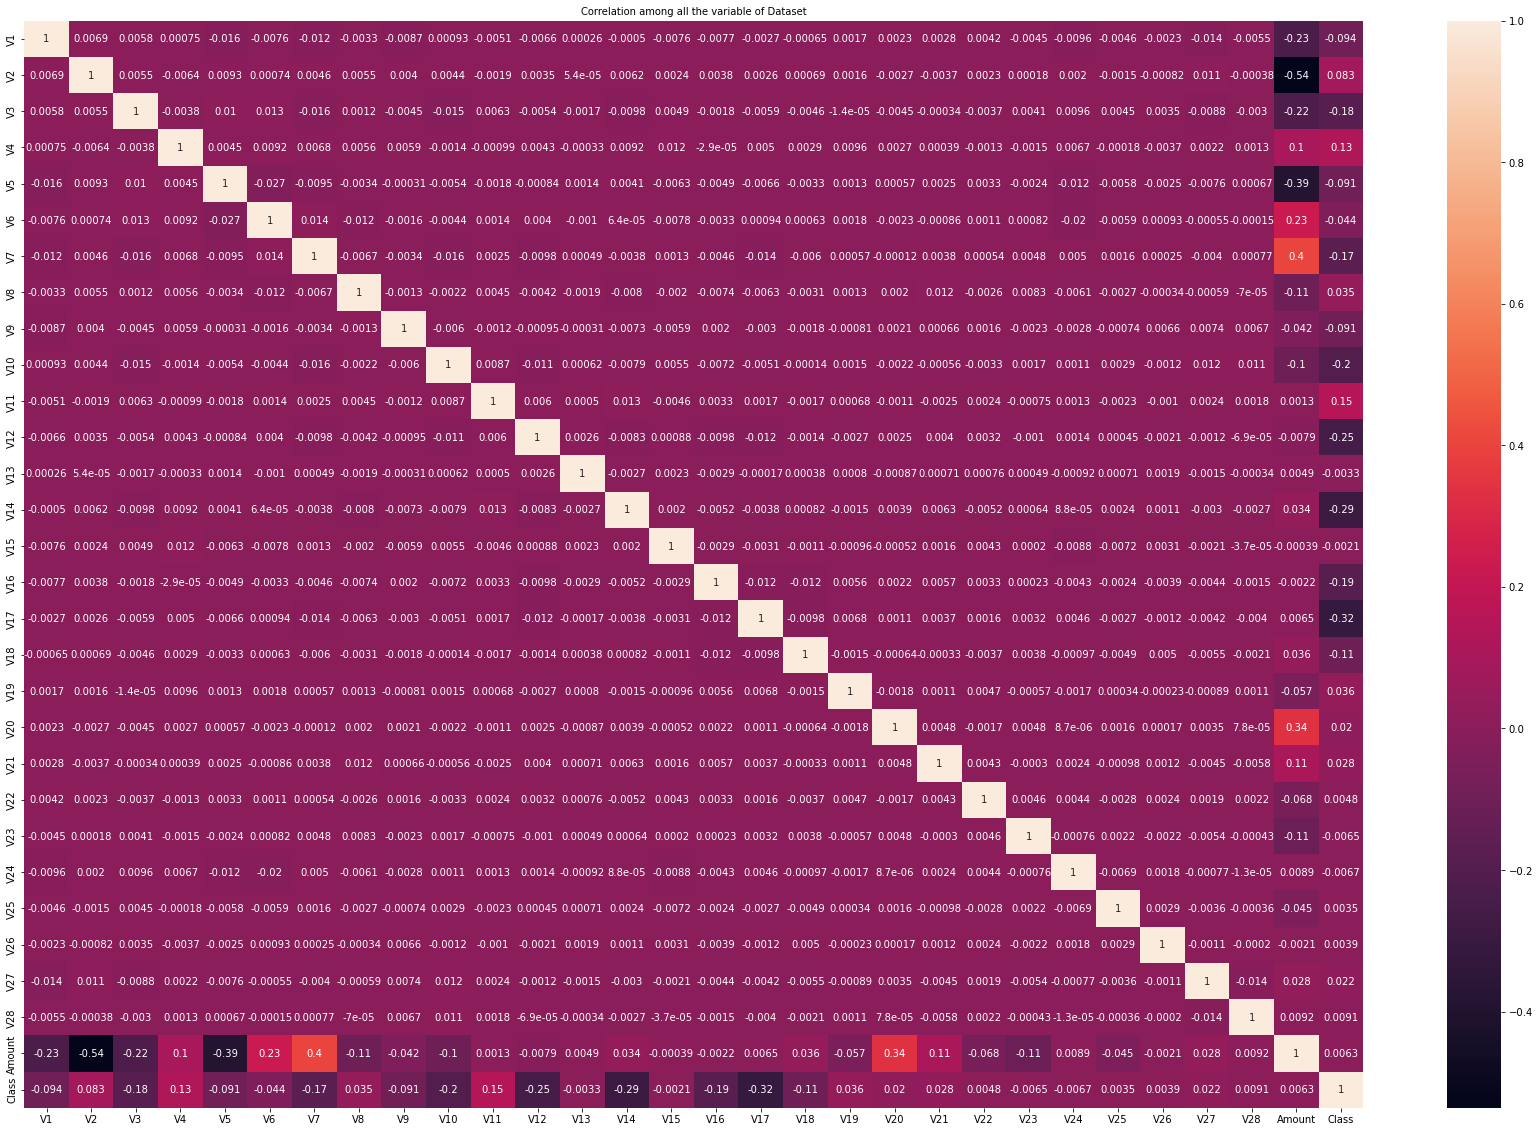

In [14]:
cor = df.corr()
plt.figure(figsize = (30,20), facecolor = 'w')
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns, annot= True)
plt.title("Correlation among all the variable of Dataset", size=10)

No remarkable correlation value is noted

In [15]:
df.corr().where((df.corr()>0.5) & (df.corr() != 1))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking dataset is balanced or not!

In [16]:
df['Class'].value_counts()

0    273452
1       448
Name: Class, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution \n (0: Not a fraud || 1: Fraud)')

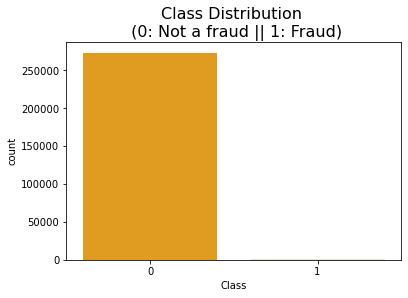

In [17]:
colors = ["#FFA500", "#EEDFCC"]
sns.countplot('Class', data = df, palette = colors,)
plt.title('Class Distribution \n (0: Not a fraud || 1: Fraud)',fontsize=16)

In [18]:
print('Normal Transcations', round(df['Class'].value_counts()[0]/len(df)*100,2),'% of dataset')
print('Fraud Transcations', round(df['Class'].value_counts()[1]/len(df)*100,2),'% of dataset')

Normal Transcations 99.84 % of dataset
Fraud Transcations 0.16 % of dataset


From above we can understand that only 473 fraud cases exist in 275663 transaction that is only 0.17% of total dataset and in order to reduce the baisness of output towards majority set we need to balance it. There exist various methods to reduce the baisness. 1. over sampling 2. under sampling

To analyse the class data further we will split it into two different groups fraud and normal transcation datasets

In [19]:
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

In [20]:
normal.shape

(273452, 30)

In [21]:
fraud.shape

(448, 30)

Successfully seprated the data, Now checking the statsitical difference in amount of transaction on both normal and fraud cases

In [22]:
normal.Amount.describe()

count    273452.000000
mean         91.096487
std         253.898652
min           0.010000
25%           6.850000
50%          24.000000
75%          80.000000
max       25691.160000
Name: Amount, dtype: float64

In [23]:
fraud.Amount.describe()

count     448.000000
mean      130.784353
std       265.688950
min         0.010000
25%         1.000000
50%        17.225000
75%       111.857500
max      2125.870000
Name: Amount, dtype: float64

Comparing the transaction values

In [24]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,-0.030528,-0.010063,0.033344,-0.023392,-0.007899,-0.013008,0.019630,-0.007317,-0.006952,0.009887,...,0.003770,0.001714,0.004125,-0.001651,-0.006491,-0.005413,-0.001702,0.001785,0.000965,91.096487
1,-4.580564,3.417146,-6.788438,4.418679,-3.093635,-1.426848,-5.207306,1.029125,-2.476185,-5.471846,...,0.387525,0.509190,0.091106,-0.103758,-0.107156,0.039386,0.044549,0.217839,0.076241,130.784353


# Training dataset without balancing dataset to see the difference

Spliting the dataset into features(X) and labels(y)

In [25]:
X = df.drop(['Class'], axis =1)
y = df['Class']

Spliting the dataset into the training set and testing set by train_test_split from sklearn.metrics library

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state= 45)

Now, running logistic regression model because of binary nature of dataset. The label is categorical

In [27]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

C:\Users\BCS`\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
pred1 = LR.predict(X_test)

In [29]:
print("Accuracy-",accuracy_score(y_test,pred1))
print("precision-", precision_score(y_test,pred1))
print("recall-", recall_score(y_test,pred1))
print("F1 score-", f1_score(y_test,pred1))

Accuracy- 0.9992515516611902
precision- 0.8518518518518519
recall- 0.5822784810126582
F1 score- 0.6917293233082706


we can clearly see that the accuracy is good and precision is also good because of the fact that they data is favouring majority class but recall and f1 values clearly shows its not a good factor of prediction

# Handling Imbalance dataset
1. Over sampling
2. Under sampling

# Undersampling

In [30]:
normal.shape

(273452, 30)

In [31]:
fraud.shape

(448, 30)

randomly selecting 448 data rows from normal transactions

In [32]:
normal_sample = normal.sample(n=448)
normal_sample.shape

(448, 30)

below dfu is dataframeundersampling

In [33]:
dfu = pd.concat([normal_sample,fraud],ignore_index=True)
dfu['Class'].value_counts()

0    448
1    448
Name: Class, dtype: int64

# Correlation matrices

Text(0.5, 1.0, 'Correlation among all the variable of Dataset-not a good correlation')

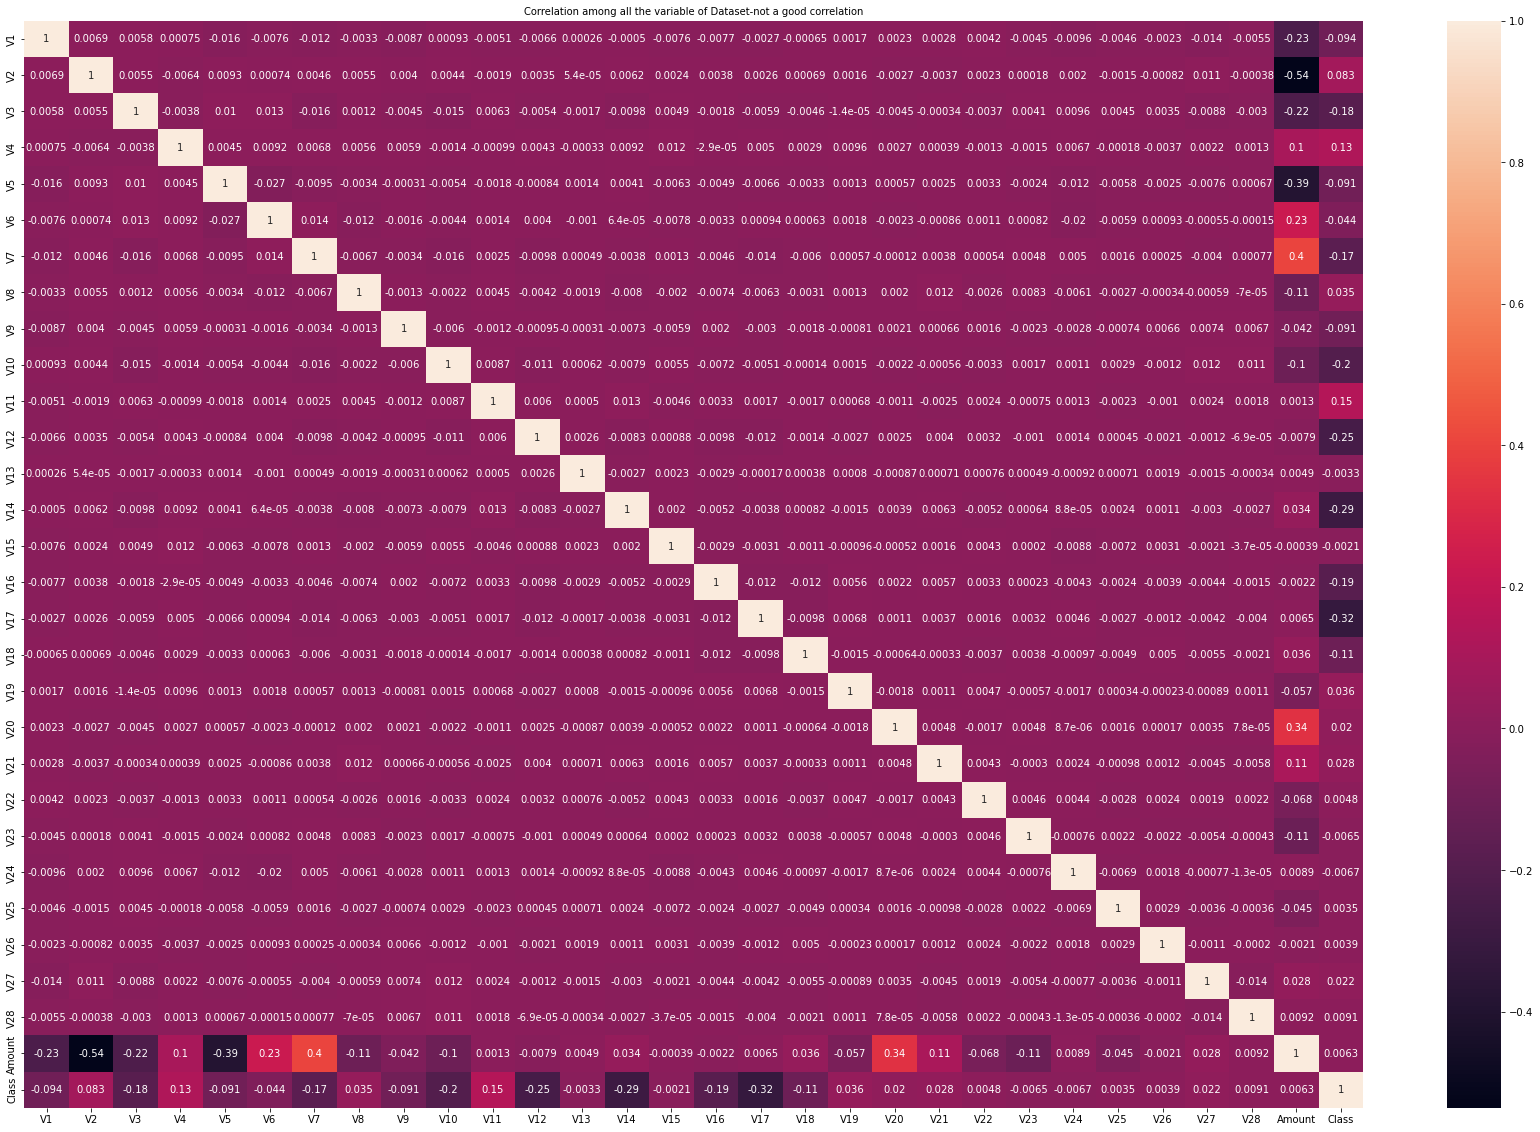

In [34]:
cor = df.corr()
plt.figure(figsize = (30,20), facecolor = 'w')
sns.heatmap(cor, xticklabels = cor.columns, yticklabels = cor.columns, annot= True)
plt.title("Correlation among all the variable of Dataset-not a good correlation", size=10)

In [35]:
df.corr().where((df.corr()>0.5) & (df.corr() != 1))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In above graph no remarkable values are found

Text(0.5, 1.0, 'Correlation among all the variable of Dataset-For reference')

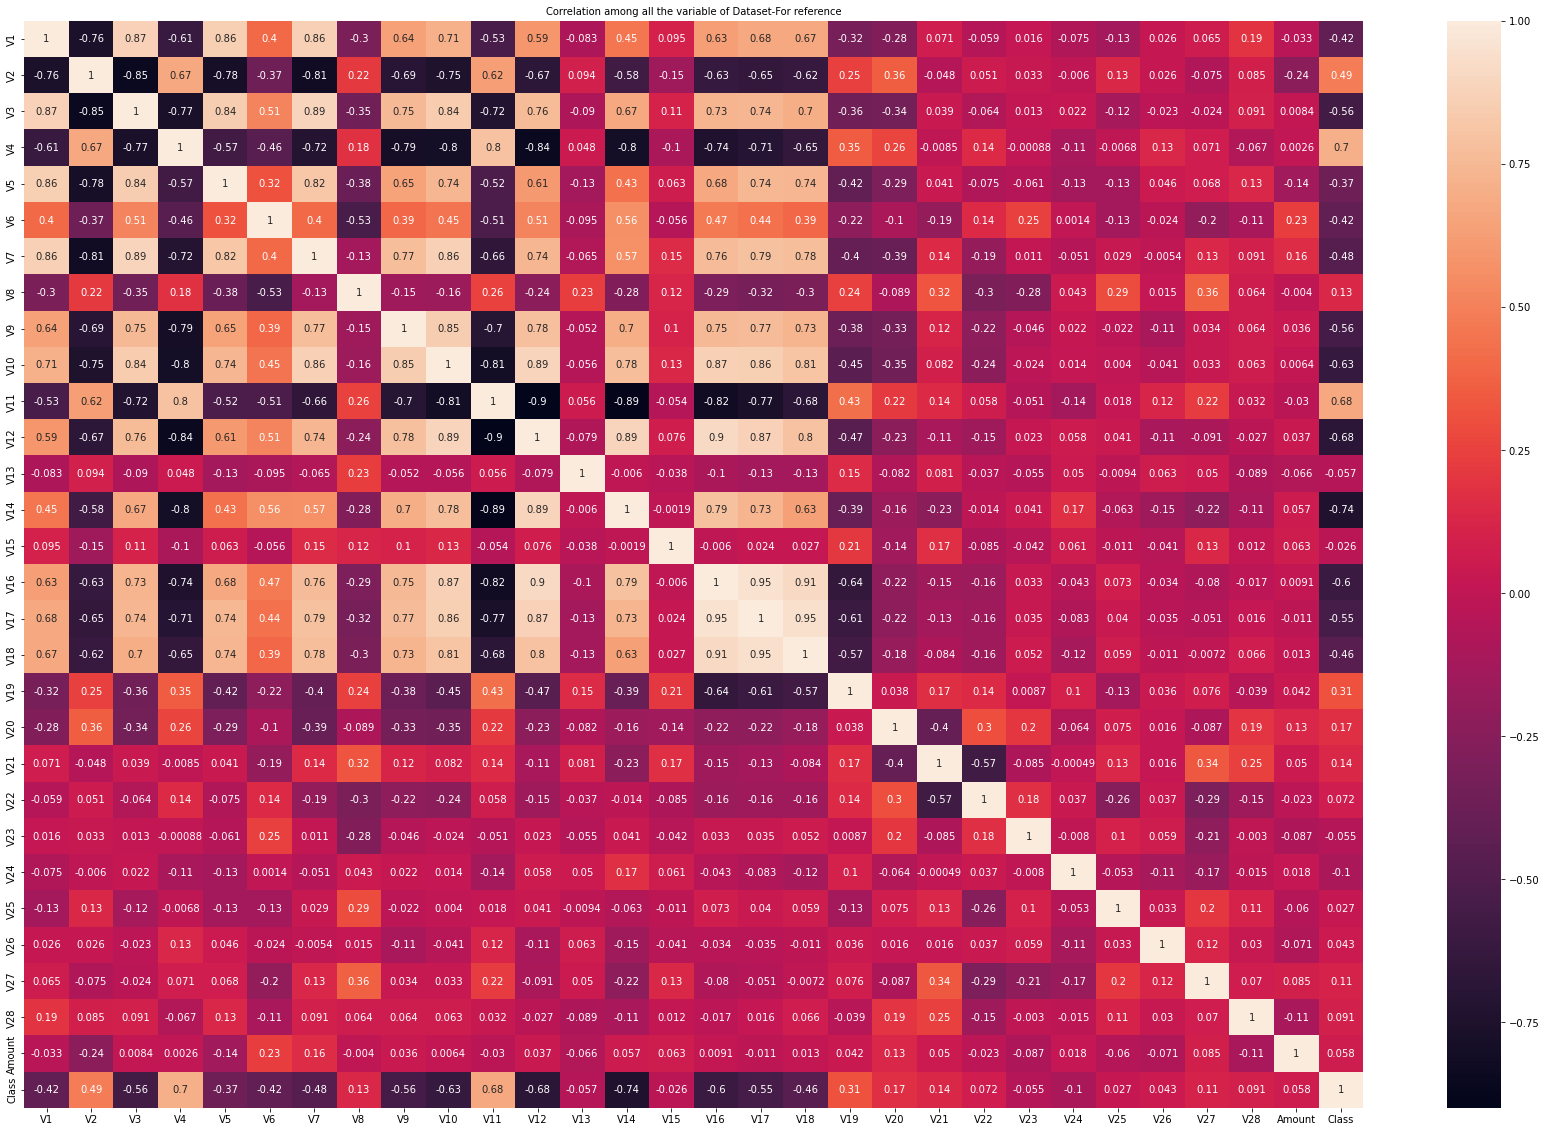

In [36]:
cor_u = dfu.corr()
plt.figure(figsize = (30,20), facecolor = 'w')
sns.heatmap(cor_u, xticklabels = cor_u.columns, yticklabels = cor_u.columns, annot= True)
plt.title("Correlation among all the variable of Dataset-For reference", size=10)

In [37]:
dfu.corr().where((dfu.corr()>0.8) & (dfu.corr() != 1))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,NaN,NaN,0.872130,NaN,0.855428,NaN,0.863653,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,0.872130,NaN,NaN,NaN,0.844536,NaN,0.887234,NaN,NaN,0.837333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V5,0.855428,NaN,0.844536,NaN,NaN,NaN,0.820909,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V7,0.863653,NaN,0.887234,NaN,0.820909,NaN,NaN,NaN,NaN,0.861416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.848195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V10,NaN,NaN,0.837333,NaN,NaN,NaN,0.861416,NaN,0.848195,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
X = dfu.drop(['Class'], axis=1)
y = dfu['Class']


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state= 45)

# Logistic regression after undersampling

In [40]:
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\BCS`\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
pred2 = log.predict(X_test)

In [42]:
print("Accuracy-",accuracy_score(y_test,pred2))
print("precision-", precision_score(y_test,pred2))
print("recall-", recall_score(y_test,pred2))
print("F1 score-", f1_score(y_test,pred2))

Accuracy- 0.9388888888888889
precision- 0.963855421686747
recall- 0.9090909090909091
F1 score- 0.935672514619883


# Desicion Trees after undersampling

In [43]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
pred3 = dt.predict(X_test)

In [45]:
print("Accuracy-",accuracy_score(y_test,pred3))
print("precision-", precision_score(y_test,pred3))
print("recall-", recall_score(y_test,pred3))
print("F1 score-", f1_score(y_test,pred3))

Accuracy- 0.9111111111111111
precision- 0.9
recall- 0.9204545454545454
F1 score- 0.9101123595505618


# Random forest after undersampling

In [46]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
pred4 = rf.predict(X_test)

In [48]:
print("Accuracy-",accuracy_score(y_test,pred4))
print("precision-", precision_score(y_test,pred4))
print("recall-", recall_score(y_test,pred4))
print("F1 score-", f1_score(y_test,pred4))

Accuracy- 0.9388888888888889
precision- 0.9753086419753086
recall- 0.8977272727272727
F1 score- 0.9349112426035502


In [49]:
from sklearn.metrics import classification_report

In [50]:
print('Logistic Regression:')
print(classification_report(y_test, pred2))

print('Desicion trees:')
print(classification_report(y_test, pred3))

print('Random forest:')
print(classification_report(y_test, pred4))



Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        92
           1       0.96      0.91      0.94        88

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180

Desicion trees:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        92
           1       0.90      0.92      0.91        88

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.91      0.91      0.91       180

Random forest:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        92
           1       0.98      0.90      0.93        88

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.9

# Comparing results

In [52]:
final_data = pd.DataFrame({'Models': [ 'LR','DT','RF'], "ACC": [accuracy_score(y_test,pred2)*100,
                                                               accuracy_score(y_test,pred3)*100,
                                                               accuracy_score(y_test,pred4)*100]})

# Over sampling: SMOTE

While using this method we will not copy the data instead we are going to create synthtic data rows from earlier results in order to get samples

In [53]:
df.shape

(273900, 30)

Now again spliting features and labels

In [54]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [55]:
X.shape

(273900, 29)

In [56]:
y.shape


(273900,)

Executing SMOTE

In [57]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [58]:
y_res.shape


(546904,)

In [59]:
y_res.value_counts()

0    273452
1    273452
Name: Class, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# Logistic regression after oversampling

In [61]:
log_o = LogisticRegression()
log_o.fit(X_train,y_train)

C:\Users\BCS`\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
pred1o = log_o.predict(X_test)

In [63]:
print("Accuracy-",accuracy_score(y_test,pred1o))
print("precision-", precision_score(y_test,pred1o))
print("recall-", recall_score(y_test,pred1o))
print("F1 score-", f1_score(y_test,pred1o))

Accuracy- 0.9578994523728984
precision- 0.9804549025619407
recall- 0.9345229398012858
F1 score- 0.9569380674964232


# Desicion Tree after oversampling

In [64]:
dt_o = DecisionTreeClassifier()
dt_o.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
pred2o = dt_o.predict(X_test)

In [66]:
print("Accuracy-",accuracy_score(y_test,pred2o))
print("precision-", precision_score(y_test,pred2o))
print("recall-", recall_score(y_test,pred2o))
print("F1 score-", f1_score(y_test,pred2o))

Accuracy- 0.9981075323867947
precision- 0.9974101296759015
recall- 0.998812828755114
F1 score- 0.9981109863936267


# Random forest after oversampling

In [67]:
rf_o = RandomForestClassifier()
rf_o.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
pred3o = rf_o.predict(X_test)

In [69]:
print("Accuracy-",accuracy_score(y_test,pred3o))
print("precision-", precision_score(y_test,pred3o))
print("recall-", recall_score(y_test,pred3o))
print("F1 score-", f1_score(y_test,pred3o))

Accuracy- 0.9999177187994258
precision- 0.9998356494585563
recall- 1.0
F1 score- 0.999917817975948


In [72]:
print('Logistic Regression:')
print(classification_report(y_test, pred1o))

print('Desicion trees:')
print(classification_report(y_test, pred2o))

print('Random forest:')
print(classification_report(y_test, pred3o))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     54629
           1       0.98      0.93      0.96     54752

    accuracy                           0.96    109381
   macro avg       0.96      0.96      0.96    109381
weighted avg       0.96      0.96      0.96    109381

Desicion trees:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54629
           1       1.00      1.00      1.00     54752

    accuracy                           1.00    109381
   macro avg       1.00      1.00      1.00    109381
weighted avg       1.00      1.00      1.00    109381

Random forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     54629
           1       1.00      1.00      1.00     54752

    accuracy                           1.00    109381
   macro avg       1.00      1.00      1.00    109381
weighted avg       1.0

In [70]:
final_data = pd.DataFrame({'Models': [ 'LR','DT','RF'], "ACC": [accuracy_score(y_test,pred1o),
                                                               accuracy_score(y_test,pred2o),
                                                               accuracy_score(y_test,pred3o)]})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

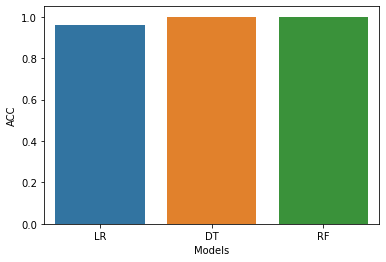

In [71]:
sns.barplot(final_data['Models'],final_data['ACC'])

# Saving the model

As per all of the above analysis we counclude that our best model here is Random forest so inorder to create a model to forcast fraud transcation we will use it.

In [73]:
rf_s = RandomForestClassifier()
rf_s.fit(X_res,y_res)

RandomForestClassifier()

In [75]:
import joblib

In [77]:
joblib.dump(rf_s, "cc model")

['cc model']

In [78]:
joblib.load("cc model")

RandomForestClassifier()

In [79]:
model = joblib.load("cc model")

In [80]:
prection = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\BCS`\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
